# Import Library

In [2]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Import Dataset

In [3]:
df = pd.read_csv('/content/hotel_bookings_data.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
0,Resort Hotel,0,342,2017,September,27,1,0,0,2,...,3,No Deposit,NaN,NaN,0,Personal,0.0,0,0,Check-Out
1,Resort Hotel,0,737,2017,September,27,1,0,0,2,...,4,No Deposit,NaN,NaN,0,Personal,0.0,0,0,Check-Out
2,Resort Hotel,0,7,2017,September,27,1,0,1,1,...,0,No Deposit,NaN,NaN,0,Personal,75.0,0,0,Check-Out
3,Resort Hotel,0,13,2017,September,27,1,0,1,1,...,0,No Deposit,304.0,NaN,0,Personal,75.0,0,0,Check-Out
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,...,0,No Deposit,240.0,NaN,0,Personal,98.0,0,1,Check-Out


# Cek Dataset

## Missing Value dan Data Duplikat

### Missing Value

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_weekdays_nights        119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

#### Persentase Missing Value

In [5]:
(df['children'].isnull().sum()/len(df['children']))*100

0.003350364352123293

In [6]:
(df['city'].isnull().sum()/len(df['city']))*100

0.40874445095904177

In [7]:
(df['agent'].isnull().sum()/len(df['agent']))*100

13.686238378423655

In [8]:
(df['company'].isnull().sum()/len(df['company']))*100

94.30689337465449

### Data Duplikat

In [9]:
df.duplicated().sum()

33261

## Handling Missing Value dan Data Duplikat

### Handling Missing Value

#### Kolom children

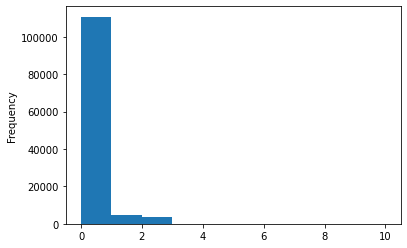

In [10]:
df['children'].plot(kind='hist')

In [11]:
#fillna median

df['children'] = df['children'].fillna(df['children'].median())

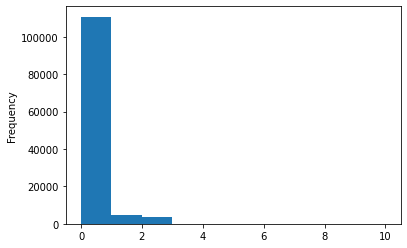

In [12]:
df['children'].plot(kind='hist')

#### Kolom city

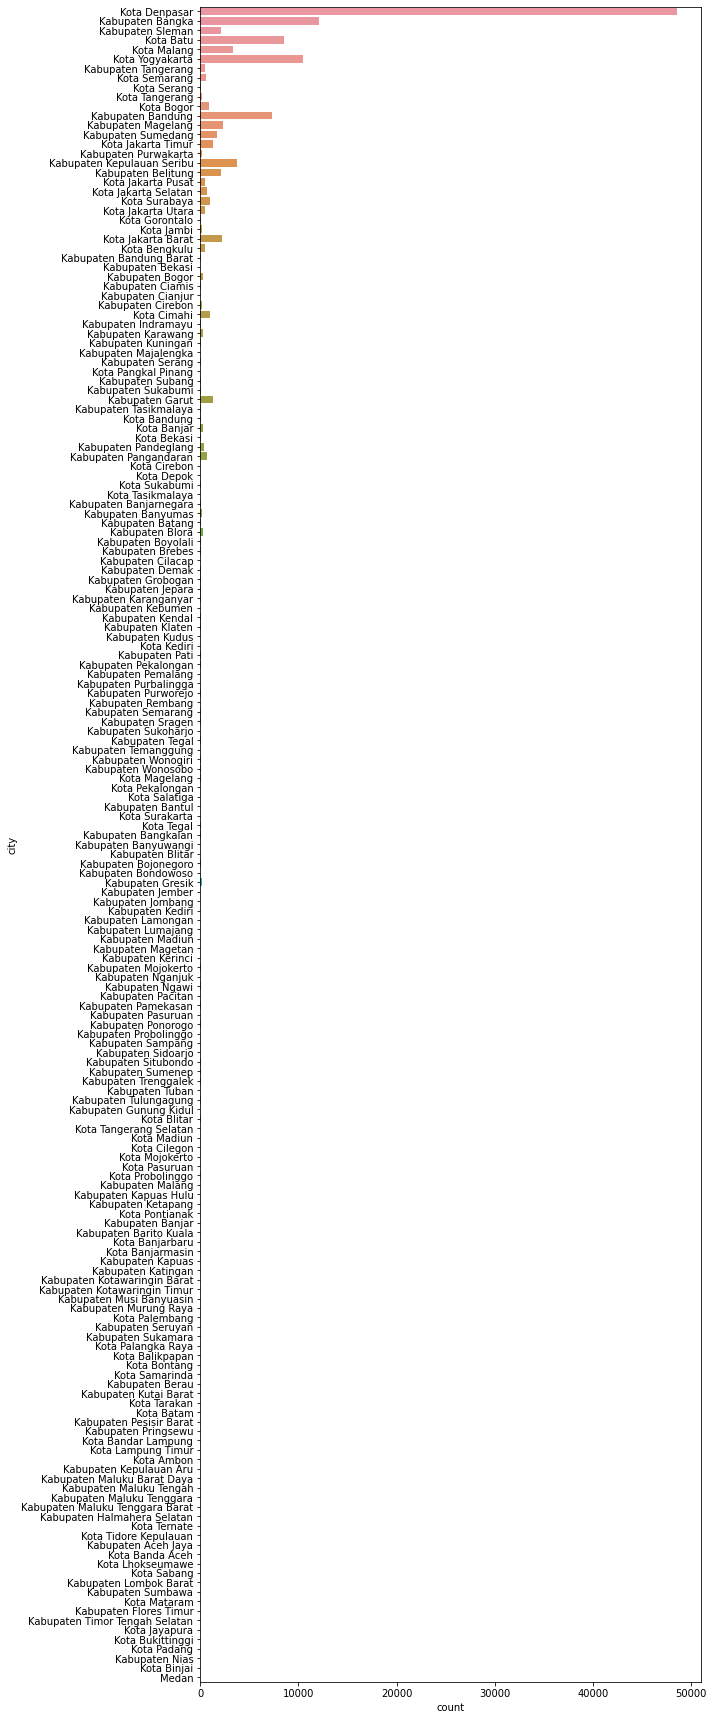

In [13]:
plt.figure(figsize=(10,24))
sns.countplot(y= df['city'],orient='v')
plt.tight_layout()

In [14]:
#fillna modus

df['city'] = df['city'].fillna(df['city'].mode()[0])

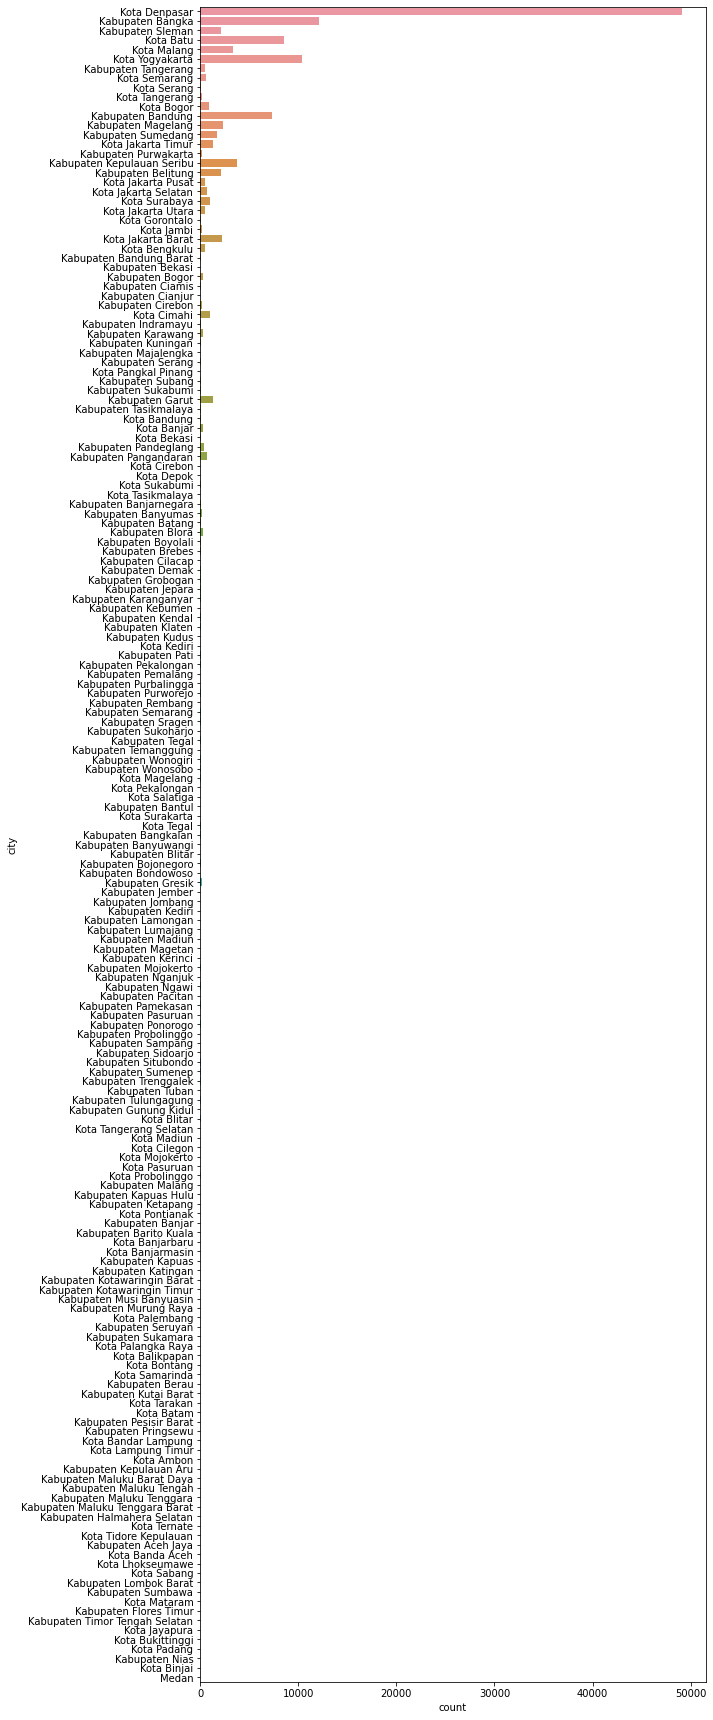

In [15]:
plt.figure(figsize=(10,24))
sns.countplot(y= df['city'],orient='v')
plt.tight_layout()

#### Kolom agent

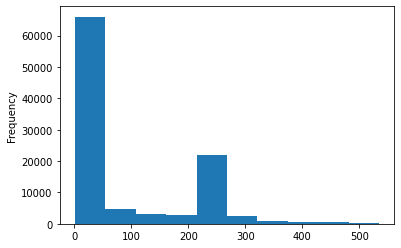

In [16]:
df['agent'].plot(kind='hist')

In [17]:
#fillna median

df['agent'] = df['agent'].fillna(df['agent'].median())

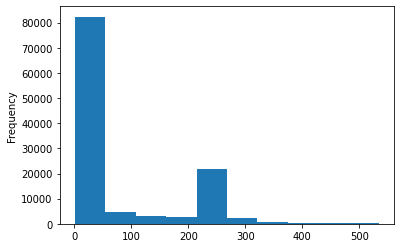

In [18]:
df['agent'].plot(kind='hist')

#### Kolom company

In [19]:
#dropna

df = df.drop(columns = 'company',axis=1)

### Cek Data Setelah Handling Missing Value

#### Jumlah Missing Value

In [20]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_weekdays_nights          0
adults                            0
children                          0
babies                            0
meal                              0
city                              0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
reservation_status          

### Handling Data Duplikat

In [21]:
#drop_duplicates

df = df.drop_duplicates().reset_index()

### Cek Data Setelah Drop Duplikat

#### Jumlah Data Duplikat

In [22]:
df.duplicated().sum()

0

### Cuplikan Data Setelah Handling Missing Value dan Data Duplikat

In [23]:
df.sample(10)

,index,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,...,previous_bookings_not_canceled,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
85255,118348,City Hotel,0,89,2019,October,33,16,0,3,...,0,1,No Deposit,9.0,0,Personal,240.00,0,1,Check-Out
49711,70774,City Hotel,1,228,2019,August,25,22,1,3,...,0,0,No Deposit,9.0,0,Personal,166.50,0,2,Canceled
19211,24163,Resort Hotel,0,468,2018,July,20,12,0,2,...,0,0,No Deposit,249.0,0,Personal,69.00,0,0,Check-Out
14045,18265,Resort Hotel,0,36,2017,January,45,7,2,6,...,0,1,No Deposit,185.0,0,Family,36.00,0,0,Check-Out
55376,81601,City Hotel,0,0,2018,May,14,28,1,0,...,3,0,No Deposit,14.0,0,Personal,65.00,0,0,Check-Out
44139,60634,City Hotel,1,25,2018,January,47,17,0,3,...,0,0,No Deposit,9.0,0,Personal,88.00,0,1,Canceled
12491,16336,Resort Hotel,0,0,2017,October,35,23,1,0,...,0,0,No Deposit,14.0,0,Personal,153.00,0,0,Check-Out
78535,110289,City Hotel,0,343,2019,June,16,21,2,2,...,0,1,No Deposit,14.0,0,Personal,99.25,0,1,Check-Out
59995,87732,City Hotel,0,6,2018,June,17,23,1,1,...,0,0,No Deposit,9.0,0,Personal,196.00,0,1,Check-Out
52012,74770,City Hotel,1,241,2017,December,43,19,1,2,...,0,1,No Deposit,1.0,0,Personal,50.00,0,0,Canceled


# Cek Kolom (Value Tidak Sesuai)

## Kolom hotel

In [24]:
df['hotel'].value_counts()

City Hotel      52573
Resort Hotel    33523
Name: hotel, dtype: int64

## Kolom arrival_date_month

In [25]:
df['arrival_date_month'].value_counts()

October      11150
September     9982
July          8241
June          7808
August        7657
May           7432
December      6717
November      6456
April         6028
February      5077
January       4920
March         4628
Name: arrival_date_month, dtype: int64

## Kolom meal

In [26]:
df['meal'].value_counts()

Breakfast     67058
No Meal        9442
Dinner         8797
Undefined       452
Full Board      347
Name: meal, dtype: int64

In [27]:
df['meal'] = df['meal'].replace('Undefined',np.nan)

In [28]:
df['meal'].value_counts()

Breakfast     67058
No Meal        9442
Dinner         8797
Full Board      347
Name: meal, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


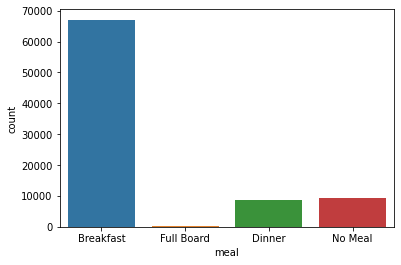

In [29]:
sns.countplot(df['meal'])

In [30]:
df['meal'].mode()[0]

'Breakfast'

In [31]:
df['meal'] = df['meal'].fillna(df['meal'].mode()[0])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


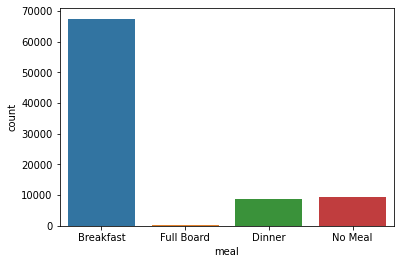

In [32]:
sns.countplot(df['meal'])

## Kolom city

In [33]:
df['city'].value_counts()

Kota Denpasar              27323
Kabupaten Bangka           10302
Kota Yogyakarta             8718
Kota Batu                   7166
Kabupaten Bandung           5279
                           ...  
Kota Bandar Lampung            1
Kota Cirebon                   1
Kota Ambon                     1
Kabupaten Maluku Tengah        1
Kota Banjarmasin               1
Name: city, Length: 177, dtype: int64

In [34]:
df[df['city']=='Undefined']

,index,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,...,previous_bookings_not_canceled,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status


## Kolom market_segment

In [35]:
df['market_segment'].value_counts()

Online TA        51388
Offline TA/TO    13489
Direct           11733
Groups            4456
Corporate         4111
Complementary      690
Aviation           227
Undefined            2
Name: market_segment, dtype: int64

In [36]:
df['market_segment'] = df['market_segment'].replace('Undefined',np.nan)

In [37]:
df['market_segment'].value_counts()

Online TA        51388
Offline TA/TO    13489
Direct           11733
Groups            4456
Corporate         4111
Complementary      690
Aviation           227
Name: market_segment, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


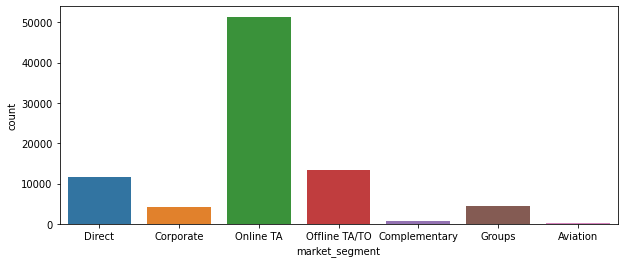

In [38]:
plt.figure(figsize=(10,4))
sns.countplot(df['market_segment'])

In [39]:
df['market_segment'] = df['market_segment'].fillna(df['market_segment'].mode()[0])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


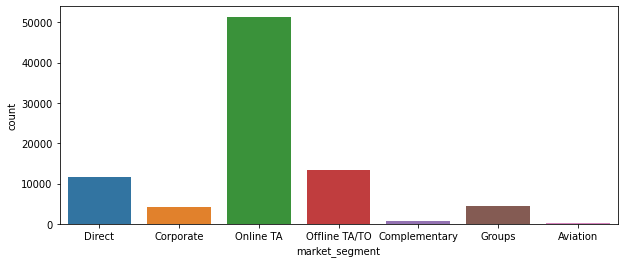

In [40]:
plt.figure(figsize=(10,4))
sns.countplot(df['market_segment'])

## Kolom distribution_channel

In [41]:
df['distribution_channel'].value_counts()

TA/TO        68133
Direct       12841
Corporate     4939
GDS            178
Undefined        5
Name: distribution_channel, dtype: int64

In [42]:
df['distribution_channel'] = df['distribution_channel'].replace('Undefined',np.nan)

In [43]:
df['distribution_channel'].value_counts()

TA/TO        68133
Direct       12841
Corporate     4939
GDS            178
Name: distribution_channel, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


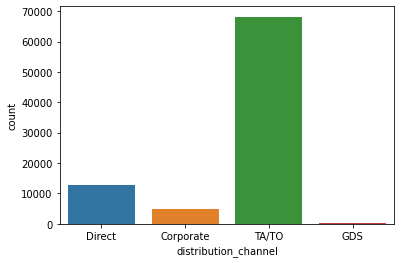

In [44]:
sns.countplot(df['distribution_channel'])

In [45]:
df['distribution_channel'] = df['distribution_channel'].fillna(df['distribution_channel'].mode()[0])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


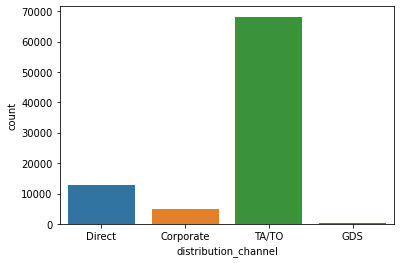

In [46]:
sns.countplot(df['distribution_channel'])

## Kolom deposit_type

In [47]:
df['deposit_type'].value_counts()

No Deposit    84991
Non Refund     1009
Refundable       96
Name: deposit_type, dtype: int64

## Kolom customer_type

In [48]:
df['customer_type'].value_counts()

Personal     71623
Family       10806
Contract      3125
Bussiness      542
Name: customer_type, dtype: int64

## Kolom reservation_status

In [49]:
df['reservation_status'].value_counts()

Check-Out    62362
Canceled     22735
No-Show        999
Name: reservation_status, dtype: int64

# Cek Kolom Yang Tidak Diperlukan

## Kolom Data Numerikal

In [50]:
df.select_dtypes('number')

,index,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
0,0,0,342,2017,27,1,0,0,2,0.0,0,0,0,0,3,14.0,0,0.00,0,0
1,1,0,737,2017,27,1,0,0,2,0.0,0,0,0,0,4,14.0,0,0.00,0,0
2,2,0,7,2017,27,1,0,1,1,0.0,0,0,0,0,0,14.0,0,75.00,0,0
3,3,0,13,2017,27,1,0,1,1,0.0,0,0,0,0,0,304.0,0,75.00,0,0
4,4,0,14,2017,27,1,0,2,2,0.0,0,0,0,0,0,240.0,0,98.00,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86091,119385,0,23,2019,35,30,2,5,2,0.0,0,0,0,0,0,394.0,0,96.14,0,0
86092,119386,0,102,2019,35,31,2,5,3,0.0,0,0,0,0,0,9.0,0,225.43,0,2
86093,119387,0,34,2019,35,31,2,5,2,0.0,0,0,0,0,0,9.0,0,157.71,0,4
86094,119388,0,109,2019,35,31,2,5,2,0.0,0,0,0,0,0,89.0,0,104.40,0,0


### Drop Kolom index

In [51]:
df = df.drop(columns=['index'],axis=1)

## Kolom Data Kategorikal

In [52]:
df.select_dtypes('object')

,hotel,arrival_date_month,meal,city,market_segment,distribution_channel,deposit_type,customer_type,reservation_status
0,Resort Hotel,September,Breakfast,Kota Denpasar,Direct,Direct,No Deposit,Personal,Check-Out
1,Resort Hotel,September,Breakfast,Kota Denpasar,Direct,Direct,No Deposit,Personal,Check-Out
2,Resort Hotel,September,Breakfast,Kabupaten Bangka,Direct,Direct,No Deposit,Personal,Check-Out
3,Resort Hotel,September,Breakfast,Kabupaten Bangka,Corporate,Corporate,No Deposit,Personal,Check-Out
4,Resort Hotel,September,Breakfast,Kabupaten Bangka,Online TA,TA/TO,No Deposit,Personal,Check-Out
...,...,...,...,...,...,...,...,...,...
86091,City Hotel,October,Breakfast,Kabupaten Magelang,Offline TA/TO,TA/TO,No Deposit,Personal,Check-Out
86092,City Hotel,October,Breakfast,Kota Yogyakarta,Online TA,TA/TO,No Deposit,Personal,Check-Out
86093,City Hotel,October,Breakfast,Kabupaten Bandung,Online TA,TA/TO,No Deposit,Personal,Check-Out
86094,City Hotel,October,Breakfast,Kabupaten Bangka,Online TA,TA/TO,No Deposit,Personal,Check-Out


## Cuplikan Data Setelah Drop Kolom index

In [53]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,previous_bookings_not_canceled,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
0,Resort Hotel,0,342,2017,September,27,1,0,0,2,...,0,3,No Deposit,14.0,0,Personal,0.0,0,0,Check-Out
1,Resort Hotel,0,737,2017,September,27,1,0,0,2,...,0,4,No Deposit,14.0,0,Personal,0.0,0,0,Check-Out
2,Resort Hotel,0,7,2017,September,27,1,0,1,1,...,0,0,No Deposit,14.0,0,Personal,75.0,0,0,Check-Out
3,Resort Hotel,0,13,2017,September,27,1,0,1,1,...,0,0,No Deposit,304.0,0,Personal,75.0,0,0,Check-Out
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,...,0,0,No Deposit,240.0,0,Personal,98.0,0,1,Check-Out


# Membuat Kolom number of visitors

In [54]:
df['number_of_visitors'] = df['adults'] + df['children'] + df['babies']

## Mengganti Tipe Data Kolom number of visitor 

In [55]:
df['number_of_visitors'].astype(int)

0        2
1        2
2        1
3        1
4        2
        ..
86091    2
86092    3
86093    2
86094    2
86095    2
Name: number_of_visitors, Length: 86096, dtype: int64

# Mengganti Data arrival date month Menjadi Angka

In [56]:
df['month_in_number'] = df['arrival_date_month'].apply(lambda x: 1 if x=='January' else
                                                                 2 if x=='February' else
                                                                 3 if x=='March' else
                                                                 4 if x=='April' else
                                                                 5 if x=='May' else
                                                                 6 if x=='June' else
                                                                 7 if x=='July' else
                                                                 8 if x=='August' else
                                                                 9 if x=='September' else
                                                                 10 if x=='October' else
                                                                 11 if x=='November' else 12)

# Agregasi 

## Penjumlahan number of visitor Ke Dalam Kolom hotel, month in number dan arrival date year

In [57]:
monthly_analysis = df.groupby(['hotel','month_in_number','arrival_date_year']).agg({'number_of_visitors':'sum'}).reset_index()                                                                                   

### Normalisasi Data

In [58]:
monthly_analysis['number_of_visitors_norm'] = MinMaxScaler(feature_range=(0,1)).fit_transform(monthly_analysis['number_of_visitors'].values.reshape(len(monthly_analysis),1))

## Modus Tanggal Kedatangan

In [59]:
modus = lambda x: stats.mode(x)[0]
monthly_analysis_date = df.groupby(['hotel','month_in_number','arrival_date_year']).agg({'arrival_date_day_of_month':modus}).reset_index()                                                                              

## Cuplikan Data

In [60]:
monthly_analysis

,hotel,month_in_number,arrival_date_year,number_of_visitors,number_of_visitors_norm
0,City Hotel,1,2017,1278.0,0.099931
1,City Hotel,1,2018,3844.0,0.542803
2,City Hotel,2,2017,1965.0,0.218502
3,City Hotel,2,2018,4182.0,0.601139
4,City Hotel,3,2018,1761.0,0.183293
5,City Hotel,3,2019,3331.0,0.454263
6,City Hotel,4,2018,3074.0,0.409907
7,City Hotel,4,2019,3959.0,0.562651
8,City Hotel,5,2018,4685.0,0.687953
9,City Hotel,5,2019,4707.0,0.691750


In [61]:
monthly_analysis_city = monthly_analysis[(monthly_analysis['hotel']=='City Hotel')]
monthly_analysis_resort = monthly_analysis[(monthly_analysis['hotel']=='Resort Hotel')]

In [62]:
monthly_analysis_city

,hotel,month_in_number,arrival_date_year,number_of_visitors,number_of_visitors_norm
0,City Hotel,1,2017,1278.0,0.099931
1,City Hotel,1,2018,3844.0,0.542803
2,City Hotel,2,2017,1965.0,0.218502
3,City Hotel,2,2018,4182.0,0.601139
4,City Hotel,3,2018,1761.0,0.183293
5,City Hotel,3,2019,3331.0,0.454263
6,City Hotel,4,2018,3074.0,0.409907
7,City Hotel,4,2019,3959.0,0.562651
8,City Hotel,5,2018,4685.0,0.687953
9,City Hotel,5,2019,4707.0,0.691750


In [63]:
monthly_analysis_resort

,hotel,month_in_number,arrival_date_year,number_of_visitors,number_of_visitors_norm
26,Resort Hotel,1,2017,1449.0,0.129444
27,Resort Hotel,1,2018,2147.0,0.249914
28,Resort Hotel,2,2017,1818.0,0.193131
29,Resort Hotel,2,2018,2200.0,0.259061
30,Resort Hotel,3,2018,1434.0,0.126855
31,Resort Hotel,3,2019,1991.0,0.222989
32,Resort Hotel,4,2018,2133.0,0.247497
33,Resort Hotel,4,2019,2578.0,0.324301
34,Resort Hotel,5,2018,2756.0,0.355022
35,Resort Hotel,5,2019,2051.0,0.233345


In [64]:
monthly_analysis_date     

,hotel,month_in_number,arrival_date_year,arrival_date_day_of_month
0,City Hotel,1,2017,23
1,City Hotel,1,2018,11
2,City Hotel,2,2017,5
3,City Hotel,2,2018,8
4,City Hotel,3,2018,19
5,City Hotel,3,2019,2
6,City Hotel,4,2018,12
7,City Hotel,4,2019,26
8,City Hotel,5,2018,24
9,City Hotel,5,2019,17


# Membuat Kolom Durasi

In [65]:
df = df[df['number_of_visitors']!=0].reset_index(drop=True)
df['number_of_visitors'].value_counts()

2.0     56253
1.0     15629
3.0     10034
4.0      3862
5.0       136
26.0        5
12.0        2
27.0        2
20.0        2
10.0        2
40.0        1
50.0        1
55.0        1
6.0         1
Name: number_of_visitors, dtype: int64

In [66]:
df['duration'] = df['stays_in_weekend_nights'] + df['stays_in_weekdays_nights'].reset_index(drop=True)
df['duration'].head()

0    0
1    0
2    1
3    1
4    2
Name: duration, dtype: int64

In [67]:
df = df[df['duration']!=0].reset_index(drop=True)

In [68]:
agregasi_durasi = df.groupby('duration').agg({'number_of_visitors':'count'}).reset_index(drop=True)
agregasi_durasi

,number_of_visitors
0,16884
1,15328
2,17525
3,13380
4,6697
5,3249
6,7464
7,1059
8,778
9,1071


# Visualisasi

## Aktivitas Booking

### Analisa Bulanan Aktivitas Booking

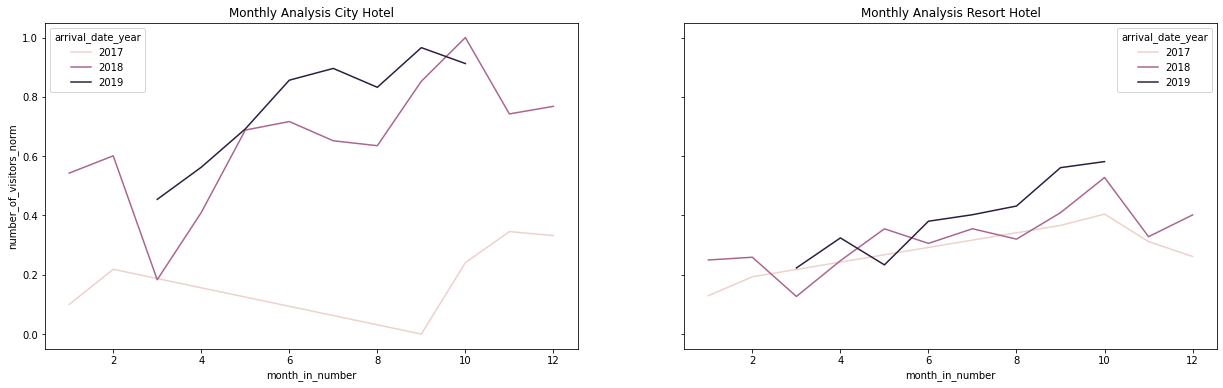

In [69]:
fig, axes = plt.subplots(1,2,figsize=(21,6), sharey=True)

sns.lineplot(ax=axes[0],x=monthly_analysis_city['month_in_number'], y=monthly_analysis_city['number_of_visitors_norm'], hue=monthly_analysis_city['arrival_date_year'], data='monthly_analysis_city')
sns.lineplot(ax=axes[1],x=monthly_analysis_resort['month_in_number'], y=monthly_analysis_resort['number_of_visitors_norm'], hue=monthly_analysis_resort['arrival_date_year'], data='monthly_analysis_resort')

ax=axes[0].set_title('Monthly Analysis City Hotel')
ax=axes[1].set_title('Monthly Analysis Resort Hotel')

### Modus Tanggal Kedatangan Pengunjung

In [70]:
monthly_analysis_city_date = monthly_analysis_date[(monthly_analysis_date['hotel']=='City Hotel')]
monthly_analysis_resort_date = monthly_analysis_date[(monthly_analysis_date['hotel']=='Resort Hotel')]

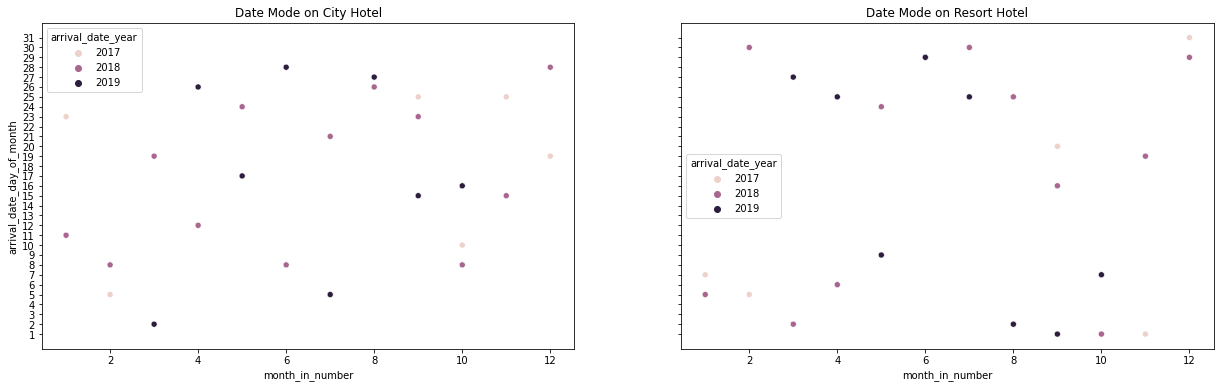

In [71]:
# sns.scatterplot(x=monthly_analysis_city_date['month_in_number'], y=monthly_analysis_city_date['arrival_date_day_of_month'], hue=monthly_analysis_city_date['arrival_date_year'], data='monthly_analysis_city_date')

fig, axes = plt.subplots(1,2,figsize=(21,6), sharey=True)

sns.scatterplot(ax=axes[0],x=monthly_analysis_city_date['month_in_number'], y=monthly_analysis_city_date['arrival_date_day_of_month'], hue=monthly_analysis_city_date['arrival_date_year'], data='monthly_analysis_city_date')
sns.scatterplot(ax=axes[1],x=monthly_analysis_resort_date['month_in_number'], y=monthly_analysis_resort_date['arrival_date_day_of_month'], hue=monthly_analysis_resort_date['arrival_date_year'], data='monthly_analysis_resort_date')

plt.yticks(ticks=np.arange(1,32,step=1),labels= np.arange(1,32,step=1))

ax=axes[0].set_title("Date Mode on City Hotel")
ax=axes[1].set_title("Date Mode on Resort Hotel")

## Durasi

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


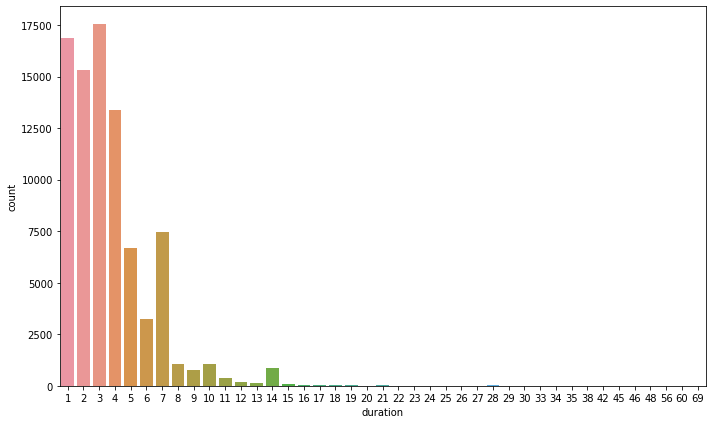

In [72]:
plt.figure(figsize=(10,6))
sns.countplot(df['duration'])
plt.tight_layout()

### Rasio Durasi

In [73]:
df['duration_category'] = df['duration'].apply(lambda x: 'Sort' if x<=2 else 'Long' if x>=4 else 'Medium')

In [74]:
df.describe(percentiles=[0.3337,0.6667])

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,...,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,number_of_visitors,month_in_number,duration
count,85345.000000,85345.000000,85345.000000,85345.000000,85345.000000,85345.000000,85345.000000,85345.000000,85345.000000,85345.000000,...,85345.000000,85345.000000,85345.000000,85345.000000,85345.000000,85345.000000,85345.000000,85345.000000,85345.000000,85345.000000
mean,0.277638,79.674685,2018.217517,26.780456,15.808636,1.016263,2.650349,1.883567,0.141039,0.011026,...,0.187076,0.268616,83.089671,0.645088,107.564155,0.085746,0.706872,2.035632,7.080485,3.666612
std,0.447836,85.522253,0.683788,13.650463,8.840967,1.029010,2.039838,0.623221,0.459497,0.114691,...,1.750084,0.712151,108.616953,9.292407,54.510457,0.283856,0.834255,0.792691,3.207497,2.742425
min,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,-6.380000,0.000000,0.000000,1.000000,1.000000,1.000000
33.4%,0.000000,21.000000,2018.000000,20.000000,11.000000,0.000000,2.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,9.000000,0.000000,80.862928,0.000000,0.000000,2.000000,6.000000,2.000000
50%,0.000000,49.000000,2018.000000,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,14.000000,0.000000,99.000000,0.000000,1.000000,2.000000,7.000000,3.000000
66.7%,0.000000,94.000000,2019.000000,33.000000,21.000000,2.000000,3.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,47.000000,0.000000,120.788448,0.000000,1.000000,2.000000,9.000000,4.000000
max,1.000000,709.000000,2019.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,...,72.000000,18.000000,535.000000,391.000000,5400.000000,8.000000,5.000000,55.000000,12.000000,69.000000


In [75]:
df_canceled = df[df['is_canceled']==1].reset_index(drop=True)
df_canceled.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,number_of_visitors,month_in_number,duration,duration_category
0,Resort Hotel,1,85,2017,September,27,1,0,3,2,...,0,Personal,82.0,0,1,Canceled,2.0,9,3,Medium
1,Resort Hotel,1,75,2017,September,27,1,0,3,2,...,0,Personal,105.5,0,0,Canceled,2.0,9,3,Medium
2,Resort Hotel,1,23,2017,September,27,1,0,4,2,...,0,Personal,123.0,0,0,Canceled,2.0,9,4,Long
3,Resort Hotel,1,60,2017,September,27,1,2,5,2,...,0,Personal,107.0,0,2,Canceled,2.0,9,7,Long
4,Resort Hotel,1,96,2017,September,27,1,2,8,2,...,0,Personal,108.3,0,2,Canceled,2.0,9,10,Long


In [76]:
hotel_duration = df_canceled.groupby(['hotel','duration_category']).agg({'is_canceled':'count'}).reset_index()
hotel_duration

,hotel,duration_category,is_canceled
0,City Hotel,Long,6253
1,City Hotel,Medium,4182
2,City Hotel,Sort,5392
3,Resort Hotel,Long,4938
4,Resort Hotel,Medium,1082
5,Resort Hotel,Sort,1848


In [77]:
hotel_duration_city = hotel_duration[hotel_duration['hotel']=='City Hotel'].reset_index(drop=True)
hotel_duration_city

,hotel,duration_category,is_canceled
0,City Hotel,Long,6253
1,City Hotel,Medium,4182
2,City Hotel,Sort,5392


In [78]:
hotel_duration_resort = hotel_duration[hotel_duration['hotel']=='Resort Hotel'].reset_index(drop=True)
hotel_duration_resort

,hotel,duration_category,is_canceled
0,Resort Hotel,Long,4938
1,Resort Hotel,Medium,1082
2,Resort Hotel,Sort,1848


In [79]:
hotel_duration_city['is_canceled_ratio'] = (hotel_duration_city['is_canceled']/sum(hotel_duration_city['is_canceled']))

In [80]:
hotel_duration_resort['is_canceled_ratio'] = (hotel_duration_resort['is_canceled']/sum(hotel_duration_resort['is_canceled']))

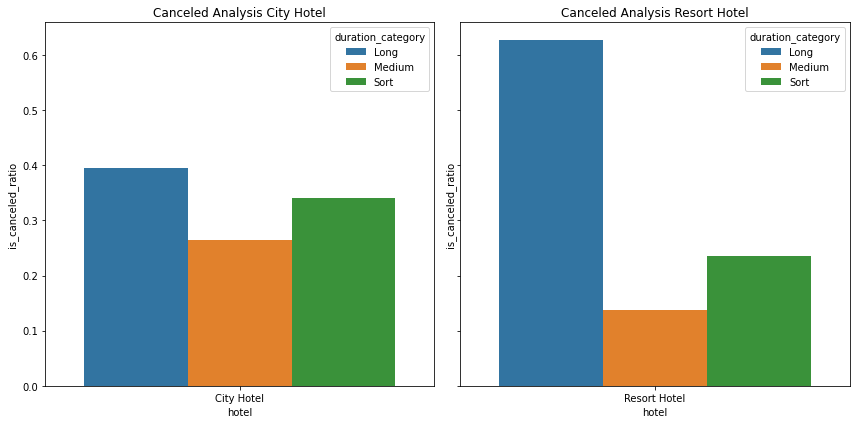

In [81]:
fig, axes = plt.subplots(1,2,figsize=(12,6),sharey=True)

sns.barplot(ax=axes[0],data=hotel_duration_city, x=hotel_duration_city['hotel'], y=hotel_duration_city['is_canceled_ratio'], hue=hotel_duration_city['duration_category'])
sns.barplot(ax=axes[1],data=hotel_duration_resort, x=hotel_duration_resort['hotel'], y=hotel_duration_resort['is_canceled_ratio'], hue=hotel_duration_resort['duration_category'])

ax=axes[0].set_title('Canceled Analysis City Hotel')
ax=axes[1].set_title('Canceled Analysis Resort Hotel')

plt.tight_layout()

### Hubungan Durasi dan Tingkat Cancel

In [82]:
hotel_duration_2 = df_canceled.groupby(['hotel','duration']).agg({'is_canceled':'count'}).reset_index()
hotel_duration_2

,hotel,duration,is_canceled
0,City Hotel,1,2259
1,City Hotel,2,3133
2,City Hotel,3,4182
3,City Hotel,4,3059
4,City Hotel,5,1257
...,...,...,...
57,Resort Hotel,29,1
58,Resort Hotel,30,2
59,Resort Hotel,33,1
60,Resort Hotel,42,1


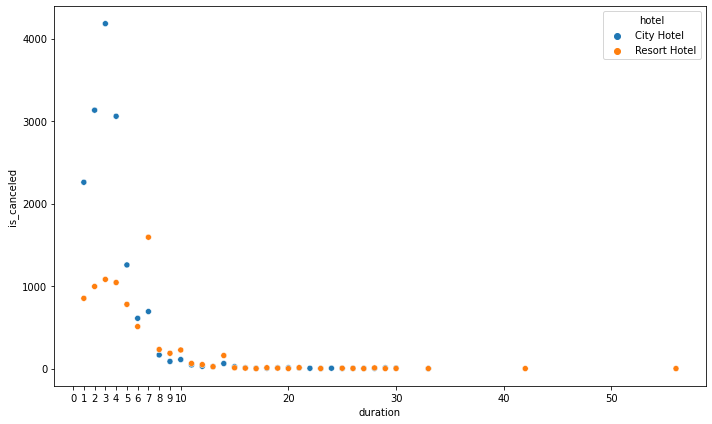

In [83]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=hotel_duration_2, x=hotel_duration_2['duration'], y=hotel_duration_2['is_canceled'], hue=hotel_duration_2['hotel'])
plt.xticks(ticks=[0,1,2,3,4,5,6,7,8,9,10,20,30,40,50],labels=[0,1,2,3,4,5,6,7,8,9,10,20,30,40,50])
plt.tight_layout()

## Lead Time

### Rasio Lead Time

In [84]:
df.describe(percentiles=[0.3337,0.6667])

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,...,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,number_of_visitors,month_in_number,duration
count,85345.000000,85345.000000,85345.000000,85345.000000,85345.000000,85345.000000,85345.000000,85345.000000,85345.000000,85345.000000,...,85345.000000,85345.000000,85345.000000,85345.000000,85345.000000,85345.000000,85345.000000,85345.000000,85345.000000,85345.000000
mean,0.277638,79.674685,2018.217517,26.780456,15.808636,1.016263,2.650349,1.883567,0.141039,0.011026,...,0.187076,0.268616,83.089671,0.645088,107.564155,0.085746,0.706872,2.035632,7.080485,3.666612
std,0.447836,85.522253,0.683788,13.650463,8.840967,1.029010,2.039838,0.623221,0.459497,0.114691,...,1.750084,0.712151,108.616953,9.292407,54.510457,0.283856,0.834255,0.792691,3.207497,2.742425
min,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,-6.380000,0.000000,0.000000,1.000000,1.000000,1.000000
33.4%,0.000000,21.000000,2018.000000,20.000000,11.000000,0.000000,2.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,9.000000,0.000000,80.862928,0.000000,0.000000,2.000000,6.000000,2.000000
50%,0.000000,49.000000,2018.000000,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,14.000000,0.000000,99.000000,0.000000,1.000000,2.000000,7.000000,3.000000
66.7%,0.000000,94.000000,2019.000000,33.000000,21.000000,2.000000,3.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,47.000000,0.000000,120.788448,0.000000,1.000000,2.000000,9.000000,4.000000
max,1.000000,709.000000,2019.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,...,72.000000,18.000000,535.000000,391.000000,5400.000000,8.000000,5.000000,55.000000,12.000000,69.000000


In [85]:
df['lead_time_category'] = df['lead_time'].apply(lambda x: 'Sort' if x<=21 else 'Long' if x>=94 else 'Medium')

In [86]:
df_canceled.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,number_of_visitors,month_in_number,duration,duration_category
0,Resort Hotel,1,85,2017,September,27,1,0,3,2,...,0,Personal,82.0,0,1,Canceled,2.0,9,3,Medium
1,Resort Hotel,1,75,2017,September,27,1,0,3,2,...,0,Personal,105.5,0,0,Canceled,2.0,9,3,Medium
2,Resort Hotel,1,23,2017,September,27,1,0,4,2,...,0,Personal,123.0,0,0,Canceled,2.0,9,4,Long
3,Resort Hotel,1,60,2017,September,27,1,2,5,2,...,0,Personal,107.0,0,2,Canceled,2.0,9,7,Long
4,Resort Hotel,1,96,2017,September,27,1,2,8,2,...,0,Personal,108.3,0,2,Canceled,2.0,9,10,Long


In [87]:
df_canceled = df[df['is_canceled']==1].reset_index(drop=True)
df_canceled.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,number_of_visitors,month_in_number,duration,duration_category,lead_time_category
0,Resort Hotel,1,85,2017,September,27,1,0,3,2,...,Personal,82.0,0,1,Canceled,2.0,9,3,Medium,Medium
1,Resort Hotel,1,75,2017,September,27,1,0,3,2,...,Personal,105.5,0,0,Canceled,2.0,9,3,Medium,Medium
2,Resort Hotel,1,23,2017,September,27,1,0,4,2,...,Personal,123.0,0,0,Canceled,2.0,9,4,Long,Medium
3,Resort Hotel,1,60,2017,September,27,1,2,5,2,...,Personal,107.0,0,2,Canceled,2.0,9,7,Long,Medium
4,Resort Hotel,1,96,2017,September,27,1,2,8,2,...,Personal,108.3,0,2,Canceled,2.0,9,10,Long,Long


In [88]:
lead_duration = df_canceled.groupby(['hotel','lead_time_category']).agg({'is_canceled':'count'}).reset_index()
lead_duration

,hotel,lead_time_category,is_canceled
0,City Hotel,Long,6752
1,City Hotel,Medium,6191
2,City Hotel,Sort,2884
3,Resort Hotel,Long,3872
4,Resort Hotel,Medium,2782
5,Resort Hotel,Sort,1214


In [89]:
lead_duration_city = lead_duration[lead_duration['hotel']=='City Hotel'].reset_index(drop=True)
lead_duration_city

,hotel,lead_time_category,is_canceled
0,City Hotel,Long,6752
1,City Hotel,Medium,6191
2,City Hotel,Sort,2884


In [90]:
lead_duration_resort = lead_duration[lead_duration['hotel']=='Resort Hotel'].reset_index(drop=True)
lead_duration_resort

,hotel,lead_time_category,is_canceled
0,Resort Hotel,Long,3872
1,Resort Hotel,Medium,2782
2,Resort Hotel,Sort,1214


In [91]:
lead_duration_city['is_canceled_ratio'] = (lead_duration_city['is_canceled']/sum(lead_duration_city['is_canceled']))

In [92]:
lead_duration_resort['is_canceled_ratio'] = (lead_duration_resort['is_canceled']/sum(lead_duration_resort['is_canceled']))

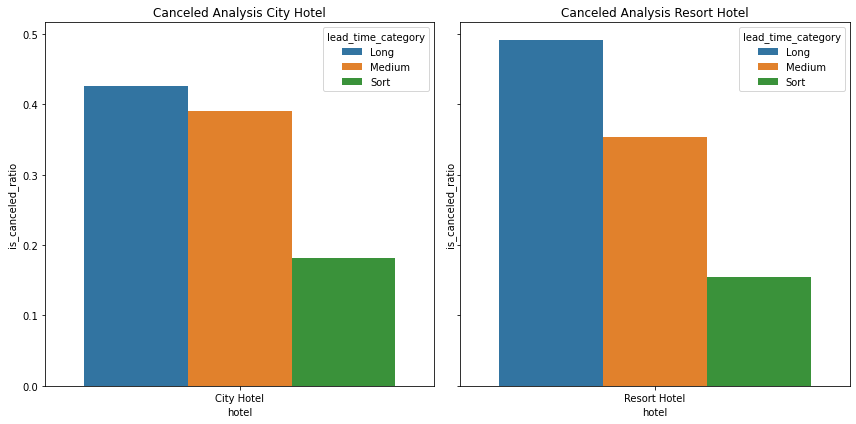

In [93]:
fig, axes = plt.subplots(1,2,figsize=(12,6),sharey=True)

sns.barplot(ax=axes[0],data=lead_duration_city, x=lead_duration_city['hotel'], y=lead_duration_city['is_canceled_ratio'], hue=lead_duration_city['lead_time_category'])
sns.barplot(ax=axes[1],data=lead_duration_resort, x=lead_duration_resort['hotel'], y=lead_duration_resort['is_canceled_ratio'], hue=lead_duration_resort['lead_time_category'])

ax=axes[0].set_title('Canceled Analysis City Hotel')
ax=axes[1].set_title('Canceled Analysis Resort Hotel')

plt.tight_layout()

### Hubungan Lead Time dan Tingkat Cancel

In [94]:
lead_duration_2 = df_canceled.groupby(['hotel','lead_time']).agg({'is_canceled':'count'}).reset_index()
lead_duration_2

,hotel,lead_time,is_canceled
0,City Hotel,0,207
1,City Hotel,1,134
2,City Hotel,2,107
3,City Hotel,3,110
4,City Hotel,4,114
...,...,...,...
832,Resort Hotel,435,1
833,Resort Hotel,450,1
834,Resort Hotel,462,1
835,Resort Hotel,468,5


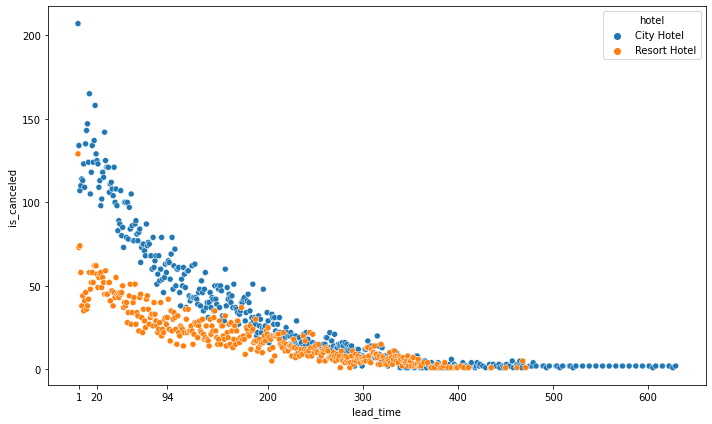

In [95]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=lead_duration_2, x=lead_duration_2['lead_time'], y=lead_duration_2['is_canceled'], hue=lead_duration_2['hotel'])
plt.xticks(ticks=[1,20,94,200,300,400,500,600],labels=[1,20,94,200,300,400,500,600])
plt.tight_layout()